# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [58]:
df = pd.read_csv('store_sharing.csv')

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Check missing values and if there are any dublicate rows or not.

In [59]:
# Check the missing values
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [60]:
# Check the duplicated rows
df.duplicated().sum()

0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)

Text(0.5, 1.0, 'New bike share distribution over seasons')

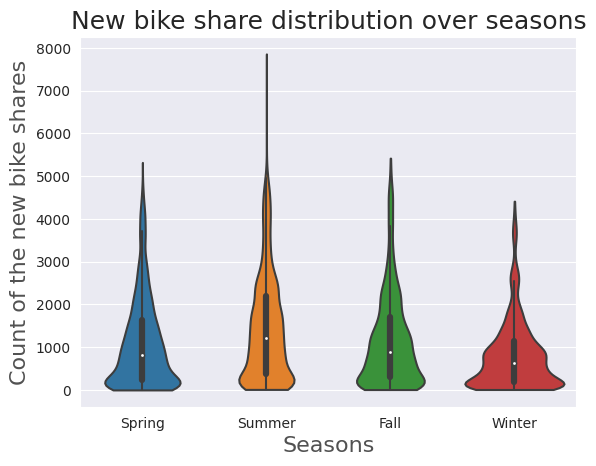

In [62]:
# season
df.head()

ax = sns.violinplot(data = df, x = 'season', y = 'cnt', cut  = 0, inner = 'box')
ax.set_xticklabels(['Spring','Summer','Fall', 'Winter'])
ax.set_xlabel("Seasons",size = 16,alpha=0.8)
ax.set_ylabel("Count of the new bike shares",size = 16,alpha=0.8)
ax.set_title("New bike share distribution over seasons",size=18)

Text(0.5, 1.0, 'Distribution of new bike shares for holidays and non-holidays')

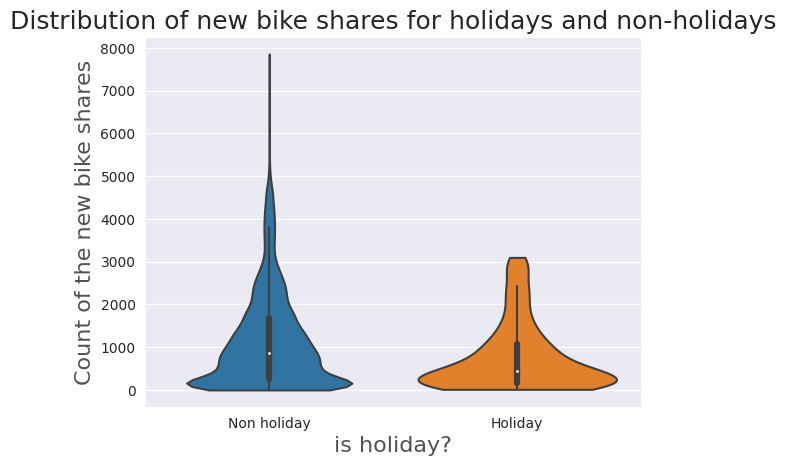

In [63]:
# is_holiday
ax = sns.violinplot(data = df, x = 'is_holiday', y = 'cnt', cut  = 0, inner = 'box')
ax.set_xticklabels(['Non holiday','Holiday'])
ax.set_xlabel("is holiday?",size = 16,alpha=0.8)
ax.set_ylabel("Count of the new bike shares",size = 16,alpha=0.8)
ax.set_title("Distribution of new bike shares for holidays and non-holidays",size=18)

Text(0.5, 1.0, 'Distribution of new bike shares for weekdays and weekend')

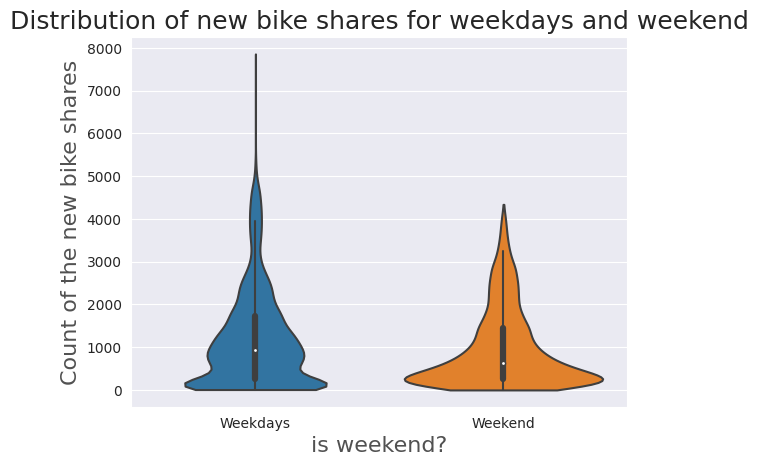

In [64]:
# is_weekend
ax = sns.violinplot(data = df, x = 'is_weekend', y = 'cnt', cut  = 0, inner = 'box')
ax.set_xticklabels(['Weekdays','Weekend'])
ax.set_xlabel("is weekend?",size = 16,alpha=0.8)
ax.set_ylabel("Count of the new bike shares",size = 16,alpha=0.8)
ax.set_title("Distribution of new bike shares for weekdays and weekend",size=18)

Text(0.5, 1.0, 'Distribution of new bike shares for different weather conditions')

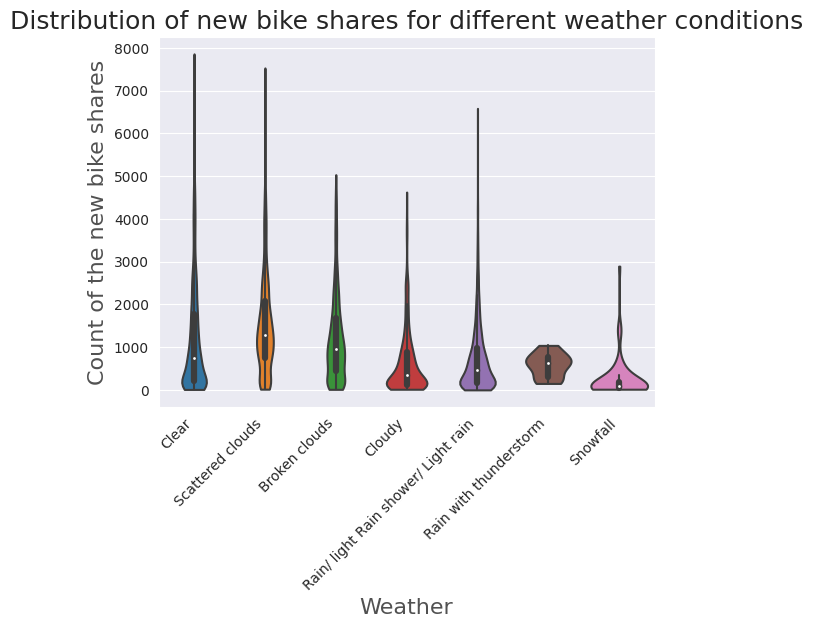

In [65]:
# weather_code
# **"weather_code" category description:**
# * 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
# * 2 = scattered clouds / few clouds 
# * 3 = Broken clouds 
# * 4 = Cloudy 
# * 7 = Rain/ light Rain shower/ Light rain 
# * 10 = rain with thunderstorm 
# * 26 = snowfall 
# * 94 = Freezing Fog

ax = sns.violinplot(data = df, x = 'weather_code', y = 'cnt', cut  = 0, inner = 'box')
ax.set_xticklabels(['Clear','Scattered clouds','Broken clouds','Cloudy','Rain/ light Rain shower/ Light rain','Rain with thunderstorm','Snowfall'])
plt.xticks(rotation=45, ha='right');
ax.set_xlabel("Weather",size = 16,alpha=0.8)
ax.set_ylabel("Count of the new bike shares",size = 16,alpha=0.8)
ax.set_title("Distribution of new bike shares for different weather conditions",size=18)

### Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [66]:
df.set_index('timestamp',inplace=True)
pd.to_datetime(df.index)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [67]:
df.insert(0,'year','')
df.insert(1,'month','')
df.insert(2,'day_of_month','')
df.insert(3,'day_of_week','')
df.insert(4,'hour','')

KeyError: 'timestamp'

In [77]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day_of_month'] = pd.DatetimeIndex(df.index).day
df['day_of_week'] = pd.DatetimeIndex(df.index).weekday
df['hour'] = pd.DatetimeIndex(df.index).hour
df

,year,month,day_of_month,day_of_week,hour,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015,1,4,6,0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015,1,4,6,1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015,1,4,6,2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015,1,4,6,3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015,1,4,6,4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017,1,3,1,19,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017,1,3,1,20,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017,1,3,1,21,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


- Timestamp is exactly two years. You can do feature engineering using the `year, month, day_of_month, day_of_week, hour` in the timestamp.

### Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [89]:
df.head()

,year,month,day_of_month,day_of_week,hour,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015,1,4,6,0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015,1,4,6,1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015,1,4,6,2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015,1,4,6,3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015,1,4,6,4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Visualize the correlation with a heatmap

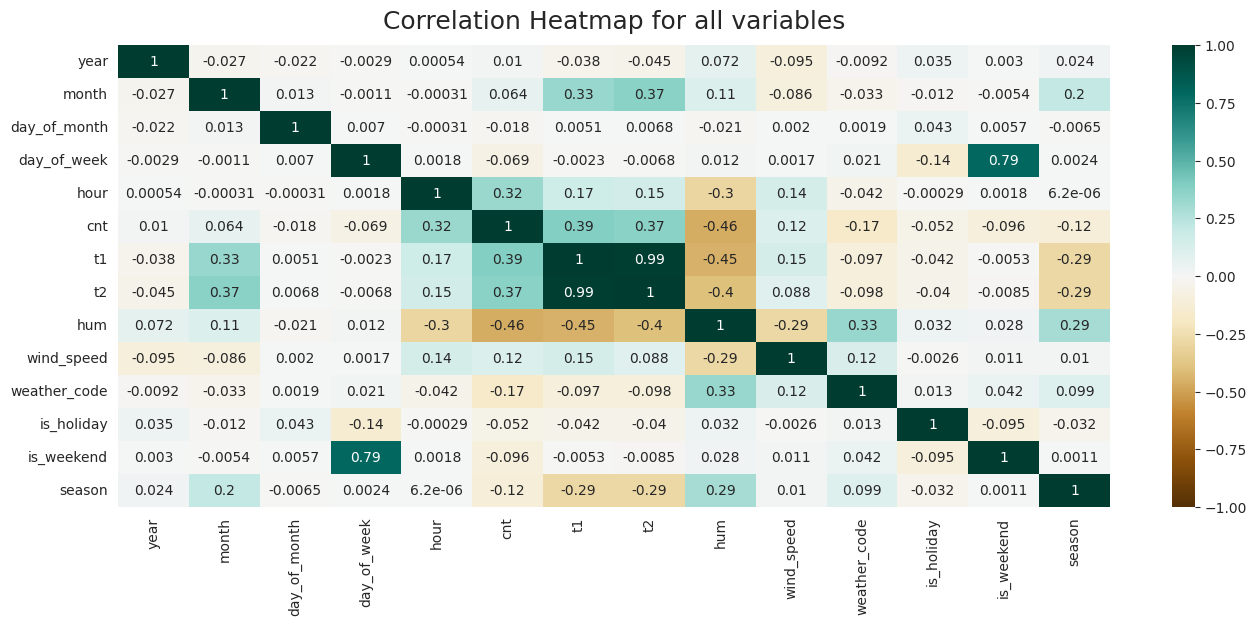

In [105]:
# for all variables 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for all variables', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


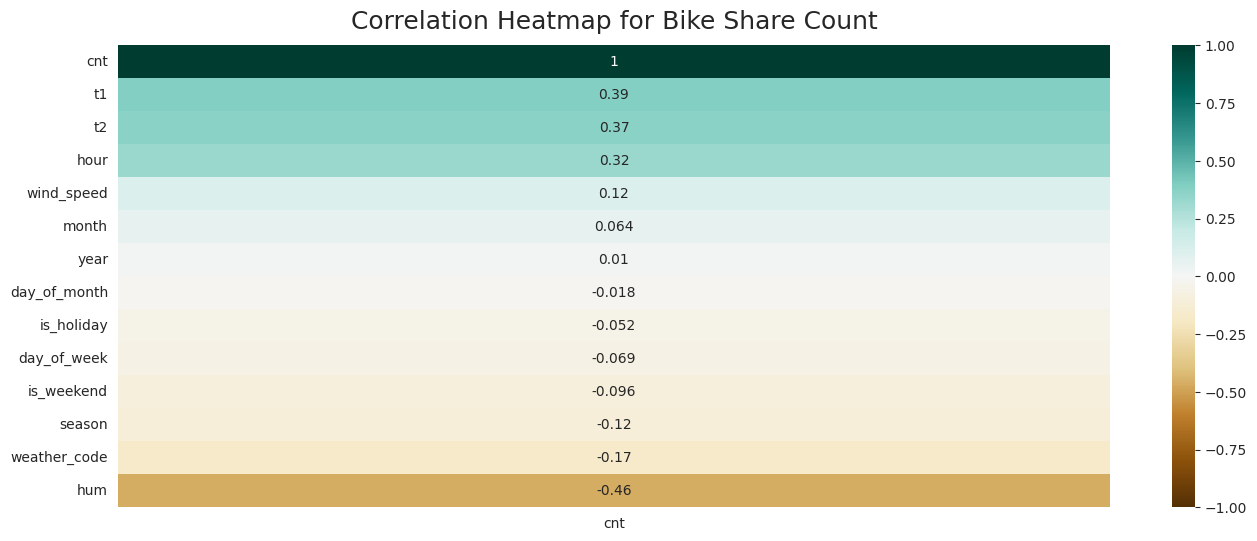

In [104]:
# for 'cnt'
cnt_cor = df.corr()[['cnt']].sort_values(by='cnt', ascending=False)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cnt_cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for Bike Share Count',
                  fontdict={'fontsize': 18}, pad=12)
cnt_cor


### Visualize the correlation of the target variable and the other features with barplot

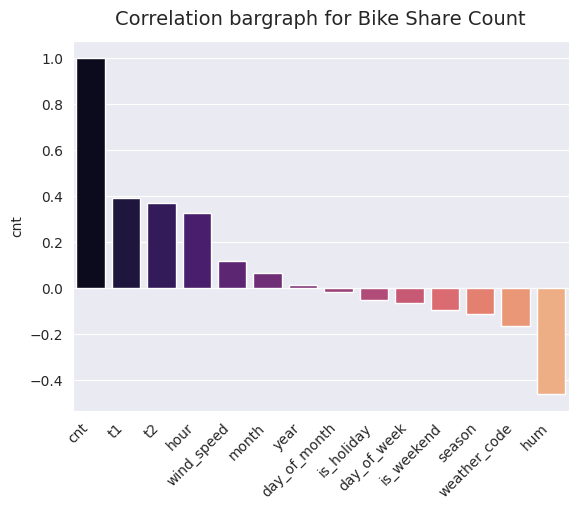

In [123]:
#with pandas

palette = sns.color_palette('magma', 16)

ax = sns.barplot(
     x= cnt_cor.index, 
     y= "cnt", 
     data= cnt_cor, 
     #hue="color",
     palette= palette
)

plt.xticks(rotation=45, ha='right');


ax.set_title('Correlation bargraph for Bike Share Count', fontdict={'fontsize':14}, pad=12);

### Plot bike shares over time using lineplot

### Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [ ]:
# with lineplot


In [ ]:
# with lineplot


In [ ]:
# with pointplot


In [ ]:
# with barplot


### Plot bike shares by hours on (holidays, weekend, season)

In [ ]:
# with lineplot (*whether it is a holiday or not*)


In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


In [ ]:
# with pointplot


### Plot bike shares based on whether it is a holiday or not
- You may want to see whether it is a holiday or not

In [ ]:
# with barplot


In [ ]:
# with pointplot


### Plot bike shares by day of month

In [ ]:
#with lineplot



### Plot bike shares by year
### Plot bike shares on holidays by seasons

In [ ]:
# with barplot


In [ ]:
# with barplot

### Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
# pie chart

In [ ]:
# with countplot


### Plot the distribution of weather code by seasons

In [ ]:
# with countplot


In [ ]:
# with catplot
